#Data Project  - Stock Market Analysis


In this project, we will answer the following questions
1) What was the change in price of the stock over time?
2) What was the daily return of the stock on average?
3) What was the moving average of the various stocks?
4) What was the correlation between different stocks' closing prices?
5) What was the correlation between different stocks' daily returns?
6) How much value do we put at risk by investing in a particular stock?
7) How can we attempt to predict future stock behavior?

###Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Start with imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For reading stock data from yahoo
from pandas.io.data import DataReader

#For time stamps
from datetime import datetime

# For division
from __future__ import division

Let's Use Yahoo and pandas to grab some data for tech stocks

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabbing yahoo finance data and setting as a data frame

for stock in tech_list:
    #Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)


note: using globals() is sloppy but effective.
Let's go ahead and play around with the AAPL DataFrame to get a feel for the data.

In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,129.607194,130.756126,128.441818,129.622727,5.456760e+07,109.245720
std,97.865078,98.820705,97.346069,98.237641,2.166783e+07,13.658601
min,90.210000,90.700000,89.650000,90.280000,1.447960e+07,87.606960
25%,99.410000,100.680000,98.570000,99.620000,4.027000e+07,97.144570
50%,111.390000,112.480000,109.350000,110.380000,4.958900e+07,108.258760
75%,125.950000,127.100000,124.660000,125.870000,6.368860e+07,124.231080
max,649.900020,651.260010,644.469970,647.349980,1.898463e+08,132.539990


In [4]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-05-27 00:00:00 to 2015-05-27 00:00:00
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

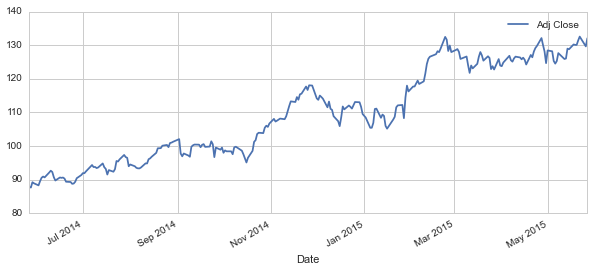

In [5]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

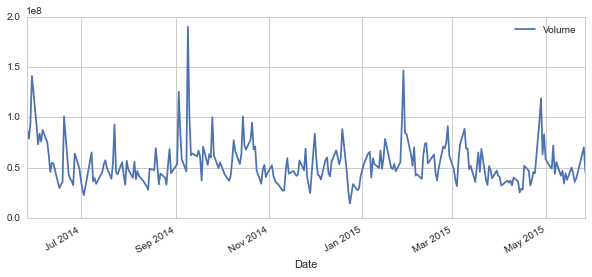

In [6]:
# Now let's plot the total volumne of stock being traded each day
# over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and calculate the moving average for the stock.

In [7]:
# We use the pandas built-in rolling mean calculator
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

Now let's go ahead and plot all the additonal moving averages

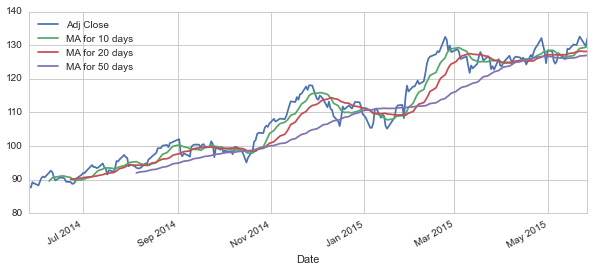

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

####Section 2 - Daily Return Analysis

How that we've done some baseline analysis, let's go ahead and dive a bit deeping. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

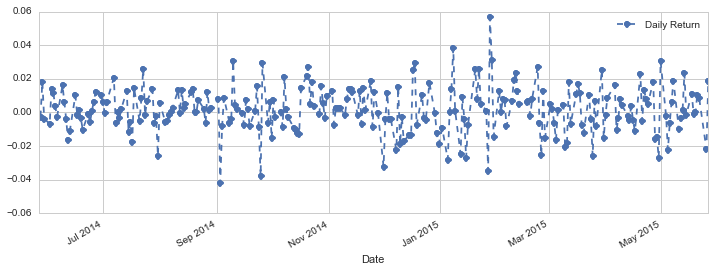

In [9]:
#We'll use pct_change to find the percent change for each day
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()
#Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,
                         linestyle='--',marker='o')

Now we will get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

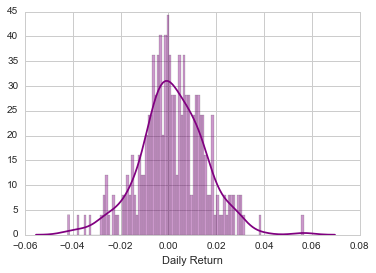

In [10]:
# Note the use of dropna() here, otherwise the NAN values cannot be 
# read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

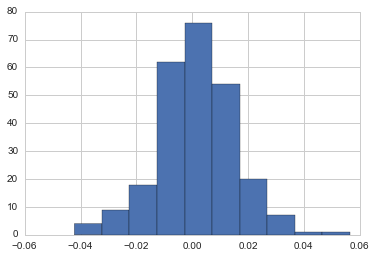

In [11]:
AAPL['Daily Return'].hist()

In order to analyze the returns of all the stocks in our list, we will need to build a DataFrame with all the ['Close'] columns for each of the stock's dataframes.

In [12]:
# Grab all the closing prices for the tech stock lists into one 
# DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',
                       start,end)['Adj Close']

In [13]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-05-27,87.83440,310.82001,565.95258,39.15527
2014-05-28,87.60696,310.16000,561.68250,38.97990
2014-05-29,89.20324,313.78000,560.08252,39.30141
2014-05-30,88.86911,312.54999,559.89258,39.88596
2014-06-02,88.25838,308.84000,553.93250,39.73983


Now that we have all the closing prices, we can get the daily return for all the stocks, like we did for the Apple stock.

In [14]:
tech_rets = closing_df.pct_change()

Now we can compare the daily return of two stocks to check their correlation. First let's see a stock compared to itself.

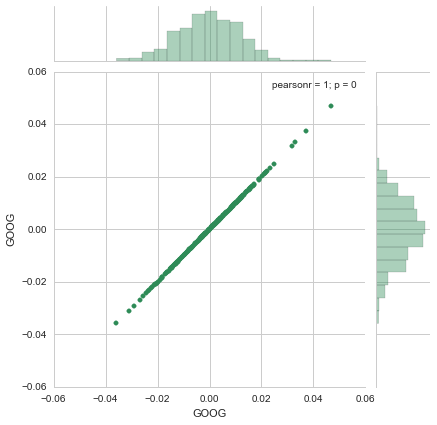

In [15]:
# Comparing google to itself (should show a perfectly linear 
# relationship)
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

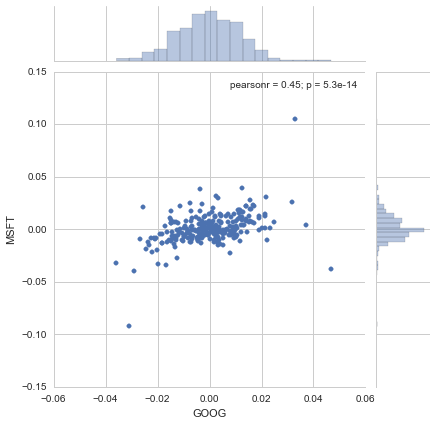

In [16]:
#comparing google to microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

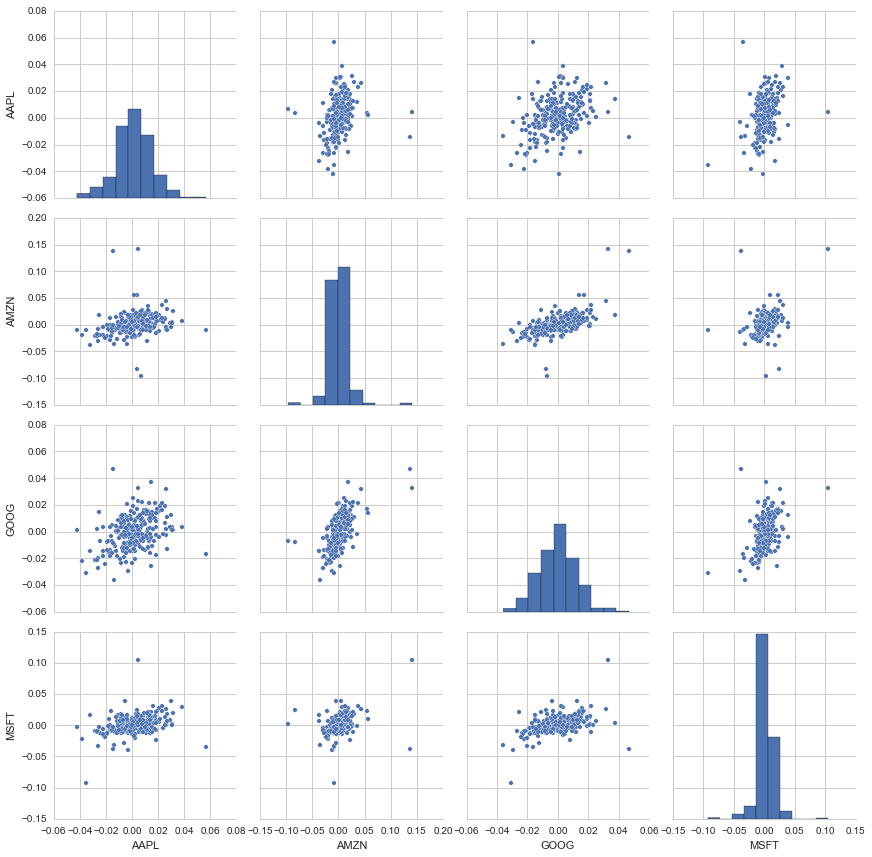

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual
# analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks; a quick glance shows an interesting correlation between Google and Amazon daily returns. we can use pairgrid() for more control over th diagonals, upper/lower triangles etc

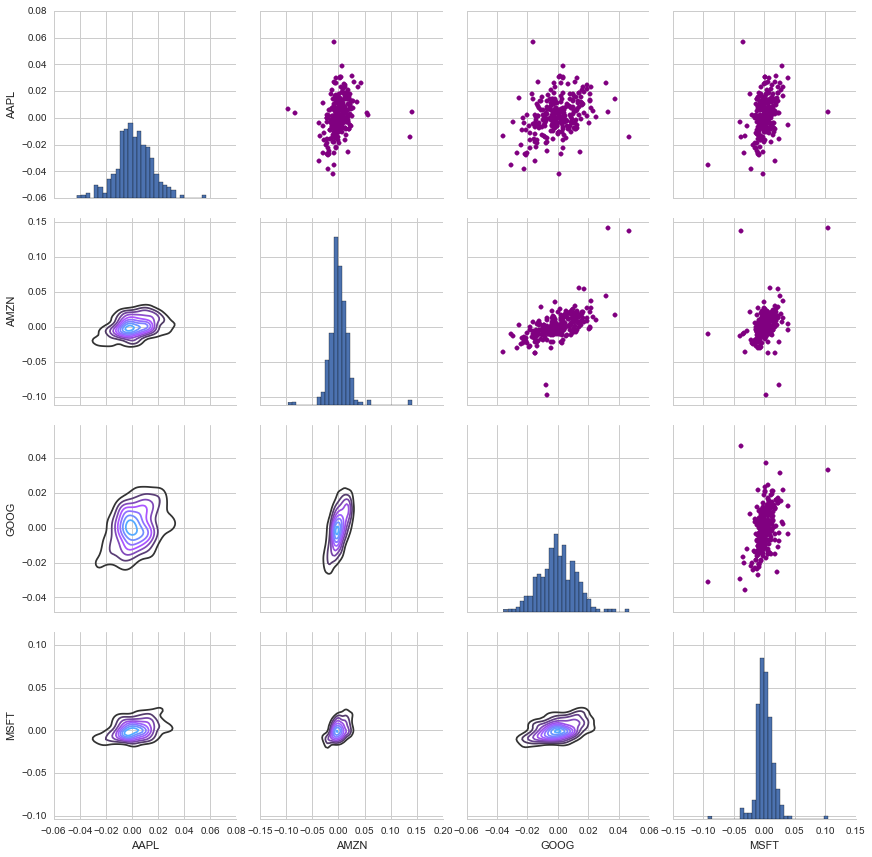

In [18]:
# Set up our figure by naming it returns_fig, call Pairplot on the
# DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look 
# like.

returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triange in the figure including the 
# plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Finally we'll define the diagonal as a series of histogram plots of 
# The daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this technique. Here it is show, the code repeated from above with the exception of the DataFrame called.

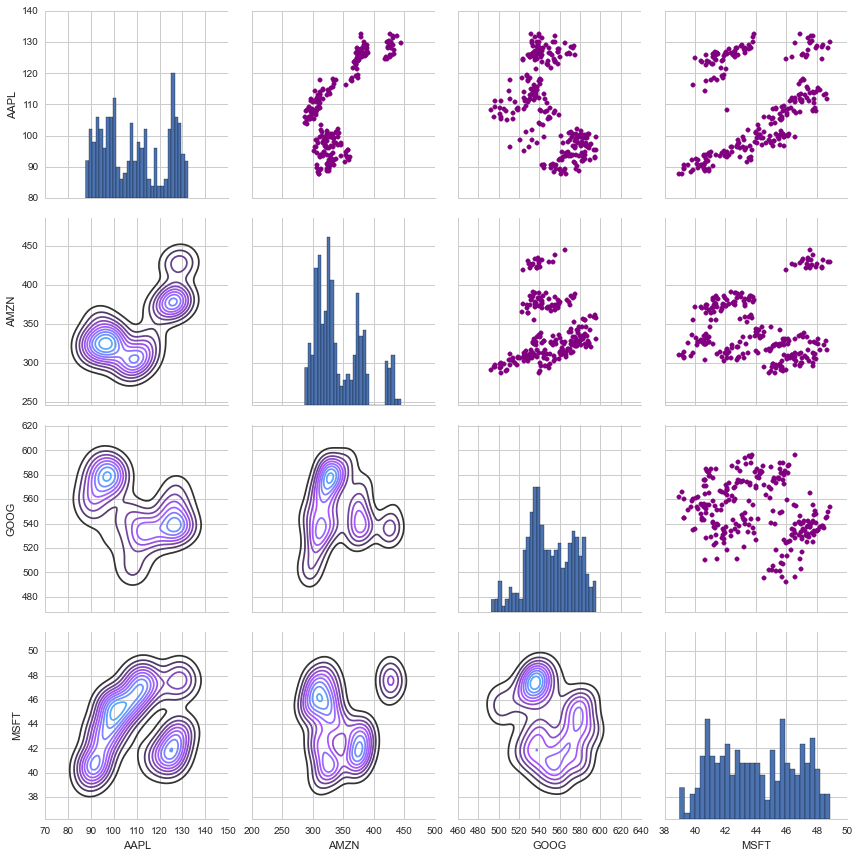

In [19]:
# Set up our figure by naming it returns_fig, call PairPlot on the 
# DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triange will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the 
# plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots
# of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an Microsoft and Apple.

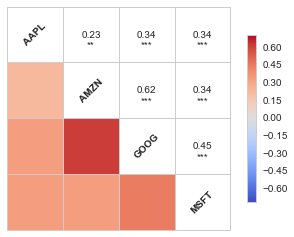

In [20]:
# Let's go ahead and use seaborn for a quick correlation plot for the
# daily returns
sns.corrplot(tech_rets.dropna(),annot=True)